In [4]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. We have the min and max temperatures in a city In India for each months of the year.
###     We would like to find a function to describe this and show it graphically, the dataset
###     given below.
####     Task:
#####       1. fitting it to the periodic function
#####       2. plot the fit
#####       Data
#####       Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#####       Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and Max Temprature')

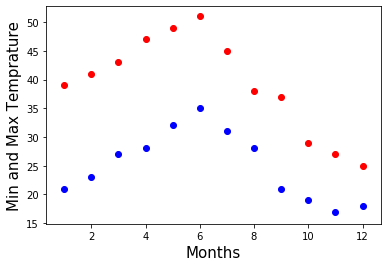

In [6]:
Max =[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(1,13)
plt.scatter(months,Max,c='r')
plt.scatter(months,Min,c='b')
plt.xlabel('Months',size = 15)
plt.ylabel('Min and Max Temprature',size = 15)

In [8]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))


In [9]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [40, 20, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])


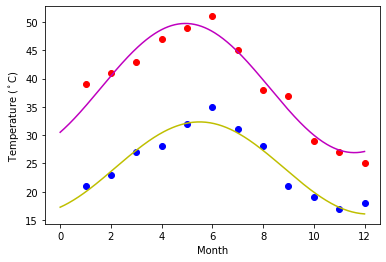

In [16]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


### 2. Create a pie chart presenting the male/female proportion of Titanic data

In [5]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
l = df['sex'].value_counts()
label = ['Male','Female']

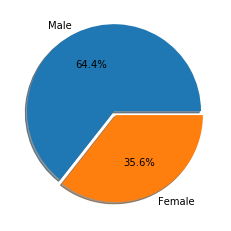

In [7]:
fig = plt.subplot()
explode = (0.05,0)
ax = fig.pie(l,labels=label,autopct='%1.1f%%',explode=explode,shadow=True)

### 3. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

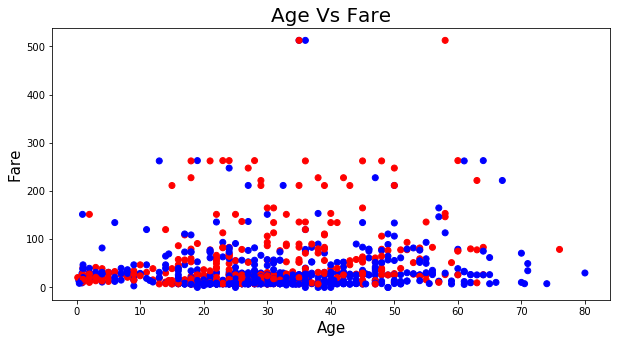

In [8]:
df = df.dropna(subset =['sex'])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set_xlabel('Age',size =15)
ax.set_ylabel('Fare',size = 15)
ax.set_title('Age Vs Fare',size=20)


mapping = {'male':'blue','female':'red'}
mapp = ['male','female']
ax.scatter(df['age'],df['fare'],c=df['sex'].map(mapping))
